In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar -zxvf spark-3.2.1-bin-hadoop2.7.tgz

#install findspark: Adds pyspark to sys.path at rubtime
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 60.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=5648638915d1a1bbbd1dfc26a735fdaf66363eaba3c47013ed9e3fad445594e6
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:


from pyspark import SparkContext, SparkConf
sc = SparkContext.getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("pySparkdf").getOrCreate()

In [ ]:
spark = SparkSession.builder.appName("pySpark csv df").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **DATASET**

In [ ]:
data = spark.read.csv(header=True, inferSchema= True, path="/content/gdrive/MyDrive/big data/Training5.csv")
data.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
type(data)

pyspark.sql.dataframe.DataFrame

In [ ]:
data.printSchema()

root
 |-- itching: integer (nullable = true)
 |-- skin_rash: integer (nullable = true)
 |-- nodal_skin_eruptions: integer (nullable = true)
 |-- continuous_sneezing: integer (nullable = true)
 |-- shivering: integer (nullable = true)
 |-- chills: integer (nullable = true)
 |-- joint_pain: integer (nullable = true)
 |-- stomach_pain: integer (nullable = true)
 |-- acidity: integer (nullable = true)
 |-- ulcers_on_tongue: integer (nullable = true)
 |-- muscle_wasting: integer (nullable = true)
 |-- vomiting: integer (nullable = true)
 |-- burning_micturition: integer (nullable = true)
 |-- spotting_ urination: integer (nullable = true)
 |-- fatigue: integer (nullable = true)
 |-- weight_gain: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- cold_hands_and_feets: integer (nullable = true)
 |-- mood_swings: integer (nullable = true)
 |-- weight_loss: integer (nullable = true)
 |-- restlessness: integer (nullable = true)
 |-- lethargy: integer (nullable = true)
 |-- pa

In [ ]:
#size of dataset
print("Number of rows : ",data.count())
print("Number of columns :", len(data.columns))

Number of rows :  32468
Number of columns : 133


In [ ]:
data.createOrReplaceTempView("data_view")

In [ ]:
data.describe()

DataFrame[summary: string, itching: string, skin_rash: string, nodal_skin_eruptions: string, continuous_sneezing: string, shivering: string, chills: string, joint_pain: string, stomach_pain: string, acidity: string, ulcers_on_tongue: string, muscle_wasting: string, vomiting: string, burning_micturition: string, spotting_ urination: string, fatigue: string, weight_gain: string, anxiety: string, cold_hands_and_feets: string, mood_swings: string, weight_loss: string, restlessness: string, lethargy: string, patches_in_throat: string, irregular_sugar_level: string, cough: string, high_fever: string, sunken_eyes: string, breathlessness: string, sweating: string, dehydration: string, indigestion: string, headache: string, yellowish_skin: string, dark_urine: string, nausea: string, loss_of_appetite: string, pain_behind_the_eyes: string, back_pain: string, constipation: string, abdominal_pain: string, diarrhoea: string, mild_fever: string, yellow_urine: string, yellowing_of_eyes: string, acute_

## DISEASES

In [ ]:
diseases = spark.sql("SELECT distinct prognosis FROM data_view")
diseases.show()

+--------------------+
|           prognosis|
+--------------------+
|            Impetigo|
|Urinary tract inf...|
|     Hyperthyroidism|
|     Gastroenteritis|
|        Heart attack|
| Chronic cholestasis|
|        Tuberculosis|
|        Hypoglycemia|
|Cervical spondylosis|
|         Hepatitis D|
|     Osteoarthristis|
|      Varicose veins|
|            Migraine|
|         Hepatitis B|
|           Arthritis|
|             Malaria|
|      Hypothyroidism|
|         Chicken pox|
|       Hypertension |
| Peptic ulcer diseae|
+--------------------+
only showing top 20 rows



# PREDICTION

In [ ]:
from pyspark.sql import DataFrameNaFunctions
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import Binarizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import avg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
test_data = spark.read.csv(header=True, inferSchema= True, path="/content/gdrive/MyDrive/big data/Testing.csv")
test_data.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
test_data.printSchema()

root
 |-- itching: integer (nullable = true)
 |-- skin_rash: integer (nullable = true)
 |-- nodal_skin_eruptions: integer (nullable = true)
 |-- continuous_sneezing: integer (nullable = true)
 |-- shivering: integer (nullable = true)
 |-- chills: integer (nullable = true)
 |-- joint_pain: integer (nullable = true)
 |-- stomach_pain: integer (nullable = true)
 |-- acidity: integer (nullable = true)
 |-- ulcers_on_tongue: integer (nullable = true)
 |-- muscle_wasting: integer (nullable = true)
 |-- vomiting: integer (nullable = true)
 |-- burning_micturition: integer (nullable = true)
 |-- spotting_ urination: integer (nullable = true)
 |-- fatigue: integer (nullable = true)
 |-- weight_gain: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- cold_hands_and_feets: integer (nullable = true)
 |-- mood_swings: integer (nullable = true)
 |-- weight_loss: integer (nullable = true)
 |-- restlessness: integer (nullable = true)
 |-- lethargy: integer (nullable = true)
 |-- pa

In [ ]:

print("Number of rows : ",test_data.count())
print("Number of columns :", len(test_data.columns))

Number of rows :  41
Number of columns : 133


## *Setting up pipeline*

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
data.show()

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(data) for column in list(set(['prognosis'])) ]

pipeline = Pipeline(stages=indexers)
df_r = pipeline.fit(data).transform(data)

df_r.show()

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:
#transforming features into vector form 
assembler = VectorAssembler(inputCols = list(set(data.columns)-set(['prognosis','prognosis_index'])), outputCol = 'features')
output = assembler.transform(df_r)
output.show(3)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [ ]:

type(output)

pyspark.sql.dataframe.DataFrame

In [ ]:
#mapping prognosis index
prognosis = output.select(["prognosis_index","prognosis"])
prognosis.show()

+---------------+----------------+
|prognosis_index|       prognosis|
+---------------+----------------+
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           24.0|Fungal infection|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
|           16.0|         Allergy|
+---------------+----------------+
only showing top 20 rows



In [ ]:
#final data that will be input
final_data = output.select(['features', 'prognosis_index'])
final_data.show(3)

+--------------------+---------------+
|            features|prognosis_index|
+--------------------+---------------+
|(132,[29,47,69,98...|           24.0|
|(132,[29,47,98],[...|           24.0|
|(132,[29,69,98],[...|           24.0|
+--------------------+---------------+
only showing top 3 rows



# Splitting the dataset

In [ ]:
train, test = final_data.randomSplit([0.7, 0.3])

In [ ]:

test.show()

+--------------------+---------------+
|            features|prognosis_index|
+--------------------+---------------+
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
|(132,[0,14,38,43,...|            7.0|
+--------------------+---------------+
only showing top 20 rows



Using Mlib we will be doing prediction 

In [ ]:
#matrix evaluator 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'prognosis_index', metricName = 'accuracy')

# LOGISTIC REGRESSION

In [ ]:
from pyspark.ml.classification import LogisticRegression
import timeit

start = timeit.default_timer()
log_reg = LogisticRegression(labelCol= 'prognosis_index', featuresCol  = 'features')
log_reg_model = log_reg.fit(train)
stop = timeit.default_timer()
log_reg_predictions = log_reg_model.transform(test)
log_reg_predictions.show()
print('LogisticRegression Accu:', multi_evaluator.evaluate(log_reg_predictions))

+--------------------+---------------+--------------------+--------------------+----------+
|            features|prognosis_index|       rawPrediction|         probability|prediction|
+--------------------+---------------+--------------------+--------------------+----------+
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|       7.0|
|(132,[0,14,38,43,...|            7.0|[-3.7949762157871...|[4.57480249411954...|

In [ ]:


print('Time: ', stop -start)  

Time:  5.795089321999967


# Random Forest

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="prognosis_index", featuresCol="features")
pipeline = Pipeline(stages=[rf])
rf_model = pipeline.fit(train)
predictions_rf = rf_model.transform(test)
predictions_rf.show()

+--------------------+---------------+------------------+
|            features|prognosis_index|        prediction|
+--------------------+---------------+------------------+
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0|10.650579159091624|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,114,11...|            2.0| 5.861248494971603|
|(132,[0,17,11

## **DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier(labelCol="prognosis_index", featuresCol="features", maxDepth=25, minInstancesPerNode=30, impurity="gini")
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(train)

In [ ]:
predictions = model.transform(test)
predictions.show()

+--------------------+---------------+--------------------+--------------------+----------+
|            features|prognosis_index|       rawPrediction|         probability|prediction|
+--------------------+---------------+--------------------+--------------------+----------+
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|       2.0|
|(132,[0,17,114,11...|            2.0|[0.0,0.0,521.0,0....|[0.0,0.0,1.0,0.0,...|

In [ ]:
print('DT Accu:', multi_evaluator.evaluate(predictions))

DT Accu: 0.6524108152565026


# USER INPUT 

In [ ]:
dict_input = {}
for x in data.columns:
    dict_input[x] = 0
dict_input.pop('prognosis',None)

0

In [ ]:
dict_input

{'abdominal_pain': 0,
 'abnormal_menstruation': 0,
 'acidity': 0,
 'acute_liver_failure': 0,
 'altered_sensorium': 0,
 'anxiety': 0,
 'back_pain': 0,
 'belly_pain': 0,
 'blackheads': 0,
 'bladder_discomfort': 0,
 'blister': 0,
 'blood_in_sputum': 0,
 'bloody_stool': 0,
 'blurred_and_distorted_vision': 0,
 'breathlessness': 0,
 'brittle_nails': 0,
 'bruising': 0,
 'burning_micturition': 0,
 'chest_pain': 0,
 'chills': 0,
 'cold_hands_and_feets': 0,
 'coma': 0,
 'congestion': 0,
 'constipation': 0,
 'continuous_feel_of_urine': 0,
 'continuous_sneezing': 0,
 'cough': 0,
 'cramps': 0,
 'dark_urine': 0,
 'dehydration': 0,
 'depression': 0,
 'diarrhoea': 0,
 'dischromic _patches': 0,
 'distention_of_abdomen': 0,
 'dizziness': 0,
 'drying_and_tingling_lips': 0,
 'enlarged_thyroid': 0,
 'excessive_hunger': 0,
 'extra_marital_contacts': 0,
 'family_history': 0,
 'fast_heart_rate': 0,
 'fatigue': 0,
 'fluid_overload117': 0,
 'fluid_overload45': 0,
 'foul_smell_of urine': 0,
 'headache': 0,
 'hig

In [ ]:
more = 'yes'
for x in range(0,100):
    if(more == 'yes' or more == 'Yes'):
        symp = input("Enter Symptoms from above: ")
        dict_input[symp]= 1
        more = input("Any more symptoms :Yes or No ")
    else:
        break

Enter Symptoms from above: weight_loss
Any more symptoms :Yes or No yes
Enter Symptoms from above: yellow_urine
Any more symptoms :Yes or No no


In [ ]:
'''
input_symp = []
for x in dict_input.values():
    input_symp.append(x)
'''

dict_input

{'abdominal_pain': 0,
 'abnormal_menstruation': 0,
 'acidity': 0,
 'acute_liver_failure': 0,
 'altered_sensorium': 0,
 'anxiety': 0,
 'back_pain': 0,
 'belly_pain': 0,
 'blackheads': 0,
 'bladder_discomfort': 0,
 'blister': 0,
 'blood_in_sputum': 0,
 'bloody_stool': 0,
 'blurred_and_distorted_vision': 0,
 'breathlessness': 0,
 'brittle_nails': 0,
 'bruising': 0,
 'burning_micturition': 0,
 'chest_pain': 0,
 'chills': 0,
 'cold_hands_and_feets': 0,
 'coma': 0,
 'congestion': 0,
 'constipation': 0,
 'continuous_feel_of_urine': 0,
 'continuous_sneezing': 0,
 'cough': 0,
 'cramps': 0,
 'dark_urine': 0,
 'dehydration': 0,
 'depression': 0,
 'diarrhoea': 0,
 'dischromic _patches': 0,
 'distention_of_abdomen': 0,
 'dizziness': 0,
 'drying_and_tingling_lips': 0,
 'enlarged_thyroid': 0,
 'excessive_hunger': 0,
 'extra_marital_contacts': 0,
 'family_history': 0,
 'fast_heart_rate': 0,
 'fatigue': 0,
 'fluid_overload117': 0,
 'fluid_overload45': 0,
 'foul_smell_of urine': 0,
 'headache': 0,
 'hig

In [ ]:
#s = spark.createDataFrame(data = dict_input,schema = data.columns)

In [ ]:
"""assembler = VectorAssembler(inputCols = list(set(data.columns)), outputCol = 'features')
s = assembler.transform(input_symp)
disease = log_reg_model.transform(s)"""

"assembler = VectorAssembler(inputCols = list(set(data.columns)), outputCol = 'features')\ns = assembler.transform(input_symp)\ndisease = log_reg_model.transform(s)"

## **With the manual input of the system we can predict the most possible prognosis**

# DOCTORS DATASET

In [ ]:
data_doc = spark.read.csv(header=True, inferSchema= True, path="/content/gdrive/MyDrive/big data/prognosis&doctor1.csv")
data_doc.show(5)

+----------------+-------+----+-------------------+-------------+-------------------+----+---------+---------------+----------------+-------------+--------+--------------------+----------------------------+--------+-------+-----------+------+-------+-----------+-----------+-----------+-----------+-----------+-------------------+------------+-----------+---------+----------------------------+------------+--------------+--------------+---------------+------------+---------------+---------+---------------------------------------+----+-----------------------+---------+--------+-----------------+--------------------+
|Fungal infection|Allergy|GERD|Chronic cholestasis|Drug Reaction|Peptic ulcer diseae|AIDS|Diabetes |Gastroenteritis|Bronchial Asthma|Hypertension |Migraine|Cervical spondylosis|Paralysis (brain hemorrhage)|Jaundice|Malaria|Chicken pox|Dengue|Typhoid|hepatitis A|Hepatitis B|Hepatitis C|Hepatitis D|Hepatitis E|Alcoholic hepatitis|Tuberculosis|Common Cold|Pneumonia|Dimorphic hemmo

In [ ]:
disease = str(input())
x = data_doc[[disease,"Dept","DC"]]
y = x[(data_doc[disease] ==1)]
print("So the dept and doctor dealing with your prognosis are :")
y

GERD
So the dept and doctor dealing with your prognosis are :


DataFrame[GERD: int, Dept: string, DC: string]

In [ ]:
y.show()

+----+--------------------+--------------------+
|GERD|                Dept|                  DC|
+----+--------------------+--------------------+
|   1|   General Physician|Dr. Amarpreet Sin...|
|   1|          Homoeopath|Dr. Mansi Arya : ...|
|   1|            Ayurveda|Dr. Inderjeet Sin...|
|   1|           Medicine |Dr. Sudhir Bhola\...|
|   1|Dietitian&Nutriti...|Dr. Sugeeta Mutre...|
+----+--------------------+--------------------+



## **Application Input**

In [ ]:
doc =  str(input("Type of Doctor:"))
adhaar = str(input("Enter your Aadhar number:"))
name = str(input("Enter your name :"))


Type of Doctor:General Physician
Enter your Aadhar number:676868686
Enter your name :Gitansh


In [ ]:
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType
rdd1 = sc.parallelize([Row(name=name, Adhaar_number =adhaar , Doctor_dept= doc)])
rdd1.collect()


[Row(name='Gitansh', Adhaar_number='676868686', Doctor_dept='General Physician')]

In [ ]:
print("Booked Successfully !!!!!!!!!")

Booked Successfully !!!!!!!!!


# Time Comparission 

In [ ]:
spark = [5.0,5.07,5.8,6.56,7.79]
collab = [5.69,6.02,6.89,7.85,8.67]
x = ["Data1","Data2","Data3","Data4","Data5"]

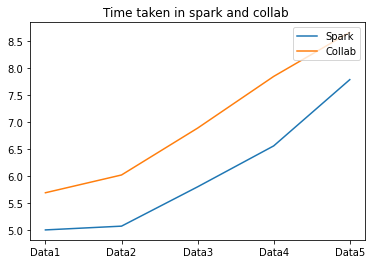

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, spark, label='Spark')
plt.plot(x, collab, label='Collab')
plt.legend(loc='upper right')
plt.title('Time taken in spark and collab ')
plt.show()

# Why are we Asking for Adhaar Number>?